#                                    THE SPARK FOUNDATION

# GRIP (Data Science & Business Analytics) Task No. 02

--------------------------------------------------------------------------------------------------------------------------------

# Prediction using UnSupervised Machine Learning

--------------------------------------------------------------------------------------------------------------------------------

### Step I : Understanding the problem Statement

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

- Let us understand what is clustering first: So, basically clustering is the process of dividing the dataset into groups, consisting of similar data points.

- Applications of clustering: Recomendation systems, search engines, etc.

- Types of clustering:

#### 1. Exclusive clustering 

As it's name suggests and stipulates that each data object can only exist in one cluster.

Here the data points belongs exclusively to one cluster i.e., they are not at all related to each other. Thus, it is also called as Hard clustering. For example: K-means clustering.

#### 2. Overlapping clusters 

It provide additional administrative capabilities. Use namelists to reduce the number of commands needed to administer overlapping clusters. You can create clusters that overlap.

#### 3. Hierarchical clustering

It is also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

### Step II : Loading Data set from its Source

Source link for data: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

##### Importing Libraries

In [2]:
import pandas as pd


##### Loading dataset

In [5]:
iris_data = pd.read_csv('Iris_data.csv')

In [6]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Print Top 5 rows using head

In [7]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


printing Bottom 10 rows using tail

In [9]:
iris_data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Step III : Exploring Data

Getting information about each Row and Column

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Describing data Statastically

In [12]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Getting names of different Species available in dataset 


In [13]:
iris_data.Species .unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### Note

Here we have THREE unique DATA POINTS 'Iris-setosa','Iris-versicolor'and 'Iris-virginica' as they are not related to each other in any way so we can use exclusive clustering


As number of unique Data points are 3

then in K-means clustering 
k = 3

- What is k-mean clustering ?

- K-means is a clustering algorithm whose main goal is to group similar data points into a cluster and the 'K' in 'K-means' represents the number of clusters. 

### Step IV: Finding the optimum number of Cluster for K-mean Clustering

##### Importing Library

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Required data

In [17]:
x = iris_data.iloc[:, 1:5].values

In [18]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
#Within Clusters Sum of Squares

WCSS = []

In [21]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

Now we will plot results using line graph this will allow us to observe elbow

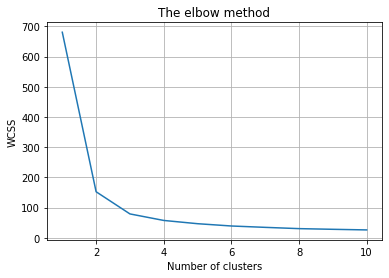

In [24]:
plt.plot(range(1, 11), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid()
plt.show()

In the above graph the Optimum value as exactly at the point where the elbow is.

Hence this method is called "ELBOW METHOD".

In our case we choosen number of clusters as 3

### Step V: Model Building

In [25]:
model = KMeans(n_clusters = 3, max_iter = 300)
model.fit(x)

KMeans(n_clusters=3)

In [27]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Step VI: Visualizing Final Result

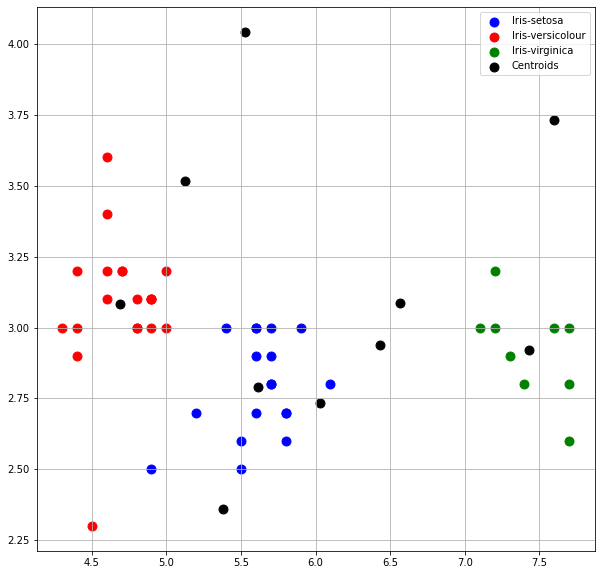

In [29]:
# Plotting the results

y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters - On the first two columns

plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 80, c = 'blue', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 80, c = 'red', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'black', label = 'Centroids')


plt.legend()
plt.grid()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

 --------------------------------------------------------------------------------------------------------------------------------

# Task Completed

### Task Done by: Gaurav Vijay Topre

Github Profile Link : https://github.com/gauravtopre9
    
LinkedIn Profile Link: https://www.linkedin.com/in/gaurav-topre-69678b1ab/